In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

from pyrosm import OSM
from pyrosm import get_data

/var/folders/pj/pdfdfscs3hjg6dyzhnb84n_80000gn/T/ipykernel_67737/1279087266.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [3]:
gpd.datasets.get_path('naturalearth_lowres')

'/home/stelath/miniconda3/envs/ml/lib/python3.9/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [25]:
world = gpd.read_file('world_land.shp')
# world = world[(world.pop_est>0) & (world.name!="Antarctica")]
# world = world.iloc[world.idx == 0]
world.head(12)

,geometry
1,"MULTIPOLYGON (((166.13697 -50.86435, 166.20525..."
2,"MULTIPOLYGON (((-78.78897 -33.60906, -78.78038..."
3,"MULTIPOLYGON (((163.98512 -20.04762, 163.98609..."
4,"MULTIPOLYGON (((134.70737 -6.58904, 134.72006 ..."
5,"MULTIPOLYGON (((-80.05989 -2.66277, -80.01452 ..."
6,"MULTIPOLYGON (((81.87599 7.09195, 81.87843 7.0..."
7,"MULTIPOLYGON (((55.01800 24.97651, 55.01580 24..."
8,"MULTIPOLYGON (((134.68979 33.82807, 134.72203 ..."
9,"MULTIPOLYGON (((14.76303 68.49486, 14.71746 68..."


<AxesSubplot: >

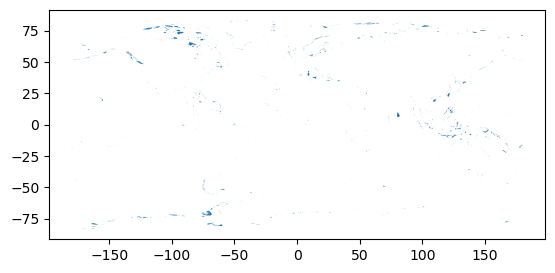

In [26]:
world.plot()

In [3]:
# Initialize the OSM parser object
osm = OSM('planet.osm.pbf', bounding_box=[-100, 50, -50, 70])
print("OSM data loaded")

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")


OSM data loaded


In [13]:
drive_net.sindex

In [109]:
offset = 0.1
coords = Point(26.95, 60.53)
# bbox = [coords[0]-offset, coords[1]-offset, coords[0]+offset, coords[1]+offset]

In [110]:
drive_net.sindex.nearest(coords)


array([[0],
       [3]])

In [111]:
# line = drive_net.iloc[175].geometry.union
line = drive_net.geometry.unary_union
# print(line)

/Users/alexanderkorte/mambaforge/envs/ml/lib/python3.8/site-packages/pygeos/set_operations.py:388: RuntimeWarning: invalid value encountered in unary_union
  result = lib.unary_union(collections, **kwargs)


In [118]:
%time rectified_coords = line.interpolate(line.project(coords))

CPU times: user 171 µs, sys: 263 µs, total: 434 µs
Wall time: 344 µs


In [116]:
coords_df

,name,geometry
0,Original,POINT (26.95000 60.53000)
1,Rectified,POINT (26.95049 60.52938)


In [114]:
print(drive_net.crs)

epsg:4326


<AxesSubplot: >

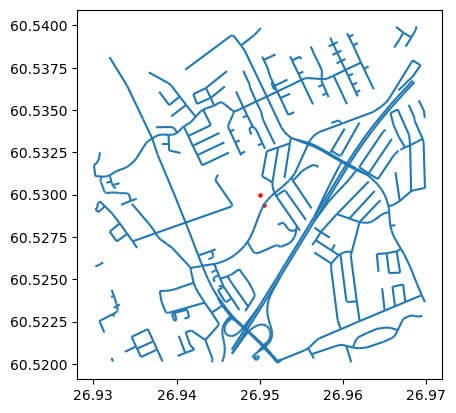

In [117]:
drive_net_plot = drive_net.plot()
coords_df = gpd.GeoDataFrame({'name': ['Original', 'Rectified'], 'geometry': [coords, rectified_coords]})
coords_df.crs = drive_net.crs
coords_df.plot(ax=drive_net_plot, marker='o', color='red', markersize=5)